In [22]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy import integrate

In [23]:
class Neutrino_Info:
    def __init__(self):
        """
        Fill the empty variables. 
        """
        self.Energy     = np.array([])
        
        self.Flux_numu  = np.array([])
        self.Flux_numub = np.array([])
        self.Flux_nue   = np.array([])
        
        self.XS_IBD     = np.array([])
        self.XS_nue_e   = np.array([])
        self.XS_nueb_e  = np.array([])
        self.XS_nux_e   = np.array([])
        self.XS_nuxb_e  = np.array([])
        self.XS_CNC     = np.array([])
        self.XS_nue_Ar  = np.array([])

In [24]:
Nu_Info = np.load("Neutrino_Info.npy").item()

In [25]:
### To calculate the number of target nucleons I need the molar mass of argon (39.948 g/mol)
### The number of grams of argon (size of the target = density x volume) density = 1.3954 g/cm^3
### Avagodro's number 6.022e+23 particles / mol
### And I will assume the detector is 1 cubic meter in size

# N_Targets = (Part / mol) x (mol / g) x (g / cm^3) x (cm^3 / m^3)
N_Targets = 6.022e+23 * (1/39.948) * (1.3954) * (1000000)

In [29]:
# EventRate_ElectronNu = y_ENu_Flux * N_Targets * Electron_Neutrino_CrossSection
# EventRate_AntiMuNu = y_aMuNu_Flux * N_Targets * AntiMu_Neutrino_CrossSection


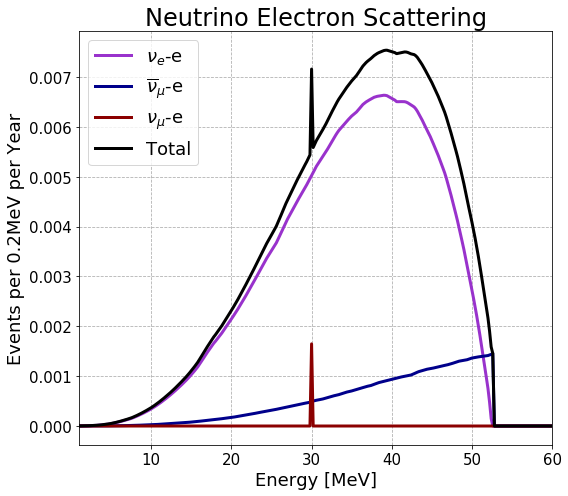

Events per Year --> 0.965


In [71]:
R_nue   = Nu_Info.Flux_nue   * N_Targets * Nu_Info.XS_nue_e
R_numub = Nu_Info.Flux_numub * N_Targets * Nu_Info.XS_nuxb_e
R_numu  = Nu_Info.Flux_numu  * N_Targets * Nu_Info.XS_nux_e
Yr = 365

plt.figure(figsize=(8,7))
plt.title("Neutrino Electron Scattering", fontsize=24)

plt.plot(Nu_Info.Energy, R_nue*Yr,   label=r"$\nu_e$-e", lw=3, color='darkorchid')
plt.plot(Nu_Info.Energy, R_numub*Yr, label=r"$\overline{\nu}_\mu$-e", lw=3, color='darkblue')
plt.plot(Nu_Info.Energy, R_numu*Yr,  label=r"${\nu}_\mu$-e", lw=3, color='darkred')

total = R_nue*Yr+R_numub*Yr+R_numu*Yr
plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_electron_scattering.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))


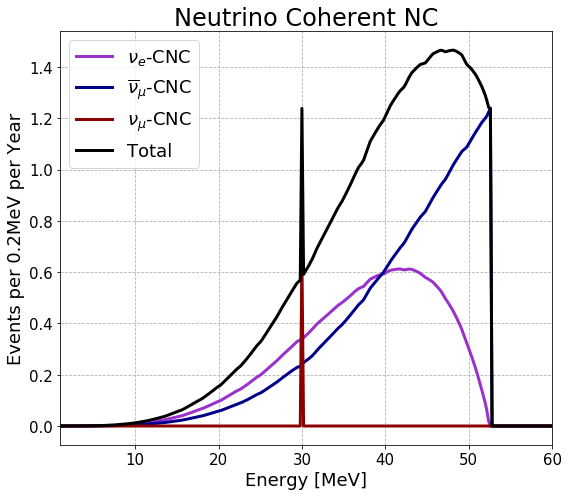

Events per Year --> 153.525


In [72]:
R_CNC1   = Nu_Info.Flux_numu  * N_Targets * Nu_Info.XS_CNC
R_CNC2   = Nu_Info.Flux_numub  * N_Targets * Nu_Info.XS_CNC
R_CNC3   = Nu_Info.Flux_nue  * N_Targets * Nu_Info.XS_CNC

Yr = 365

plt.figure(figsize=(8,7))
plt.title("Neutrino Coherent NC", fontsize=24)

plt.plot(Nu_Info.Energy, R_CNC3*Yr,   label=r"$\nu_e$-CNC", lw=3, color='darkorchid')
plt.plot(Nu_Info.Energy, R_CNC2*Yr, label=r"$\overline{\nu}_\mu$-CNC", lw=3, color='darkblue')
plt.plot(Nu_Info.Energy, R_CNC1*Yr,  label=r"${\nu}_\mu$-CNC", lw=3, color='darkred')

total = (R_CNC1+R_CNC2+R_CNC3)*Yr
plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_Coherent_NC.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))


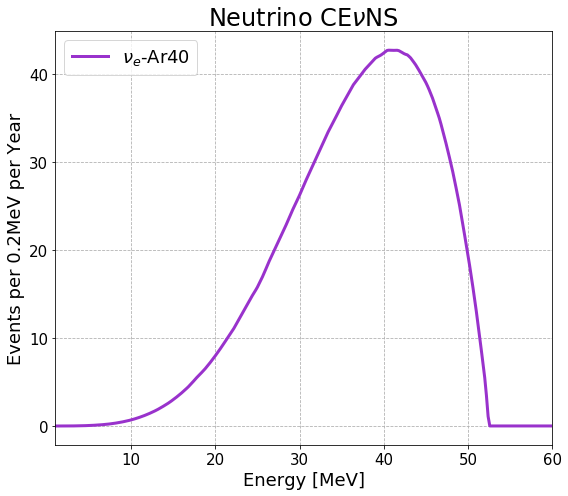

Events per Year --> 4741.684


In [73]:
R_CEVNS   = Nu_Info.Flux_nue  * N_Targets * Nu_Info.XS_nue_Ar
Yr = 365

plt.figure(figsize=(8,7))
plt.title(r"Neutrino CE$\nu$NS", fontsize=24)

plt.plot(Nu_Info.Energy, R_CEVNS*Yr,   label=r"$\nu_e$-Ar40", lw=3, color='darkorchid')
# plt.plot(Nu_Info.Energy, R_CNC2*Yr, label=r"$\overline{\nu}_\mu$-CNC", lw=3, color='darkblue')
# plt.plot(Nu_Info.Energy, R_CNC1*Yr,  label=r"${\nu}_\mu$-CNC", lw=3, color='darkred')

total = (R_CEVNS)*Yr
# plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_Coherent_NC.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))
